In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
plt.style.use('ggplot')

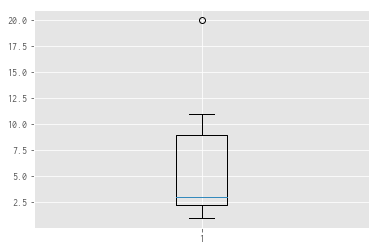

In [2]:
x = [1, 2, 3, 3, 11, 20]

fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

ax.boxplot(x)

plt.show()

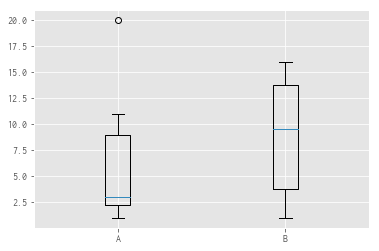

In [3]:
# 複数のリストをリストにセット
x = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10 ,15, 16]]
labels = ['A', 'B']

fig2 = plt.figure()
ax2  = fig2.add_subplot(1, 1, 1)

ax2.boxplot(x, labels=labels)

plt.show()

In [4]:
df = pd.read_csv('../sample_data/anime_master.csv', index_col='anime_id')

df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


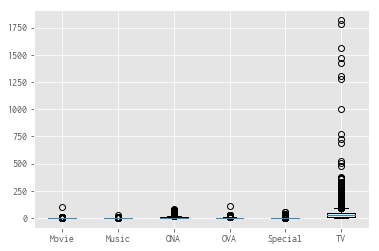

In [5]:
# 配給種別ごとのエピソードを可視化
labels = []
types_list = []

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())

fig3 = plt.figure()
ax3  = fig3.add_subplot(1, 1, 1)

ax3.boxplot(types_list, labels = labels)

plt.show()

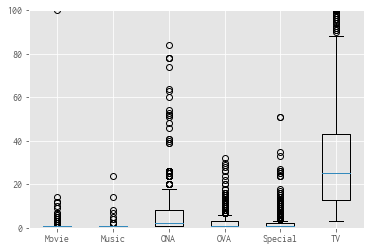

In [6]:
# 描画範囲を限定した箱ひげ図
fig4 = plt.figure()
ax4  = fig4.add_subplot(1, 1, 1)

ax4.boxplot(types_list, labels = labels)

# Y軸の描画範囲を0から100までに限定
ax4.set_ylim(0, 100)

plt.show()

In [7]:
# 四分位点の値を確認
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

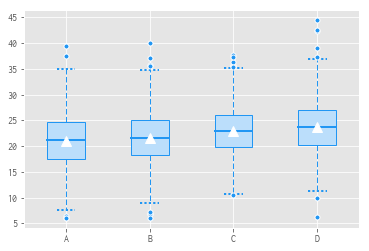

In [8]:
# 箱ひげ図の書式を一括設定する

# ① データセットを作成する
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1,5)]

# ② 書式のdictionaryを作成する
# はずれ値の書式
flierprop = {'color': '#EC407A',
            'marker': 'o',
            'markerfacecolor': '#2196F3',
            'markeredgecolor': 'white',
            'markersize': 5,
            'linestyle': 'None',
            'linewidth': 0.1}
# 箱の書式設定
boxprop = {'color': '#2196F3',
           'facecolor': '#BBDEFB',
           'linewidth': 1,
           'linestyle': '-'}
# ヒゲの書式設定
whiskerprop = {'color': '#2196F3',
           'linewidth': 1,
           'linestyle': '--'}
# ヒゲ末端キャップの書式設定
capprop = {'color': '#2196F3',
           'linewidth': 2,
           'linestyle': ':'}
# 中央値の書式設定
medianprop = {'color': '#2196F3',
           'linewidth': 2,
           'linestyle': '-'}

# 平均値の書式設定
meanprop = {'color': '#2196F3',
           'marker': '^',
           'markerfacecolor': 'white',
           'markeredgecolor': 'white',
           'markersize': 10,
           'linewidth': 1,
           'linestyle': ''}

# ③描画する
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(
    dataset,
    patch_artist='Patch', # 書式を設定する場合はPatchを設定する
    labels=['A','B','C','D'],
    showmeans = True,
    flierprops   = flierprop,
    boxprops     = boxprop,
    whiskerprops = whiskerprop,
    capprops     = capprop,
    medianprops  = medianprop,
    meanprops    = meanprop
)
plt.show()


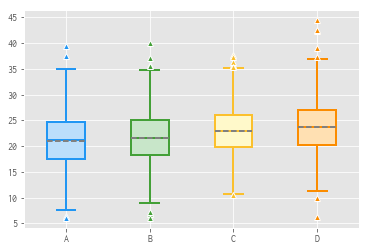

In [9]:
# 箱ひげ図の書式をボックスごとに書式設定する

# ① データセットを作成する
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1,5)]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
bp = ax.boxplot(
    dataset,
    patch_artist='Patch', # 書式を設定する場合はPatchを設定する
    labels=['A','B','C','D'],
    meanline  = True,
    showmeans = True
)

# カラーセット
colors1 = ['#2196F3', '#43A037', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9CA', '#FFE0B2']

# 上下に分かれた要素に設定するための用の数列
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 書式設定
# 箱とはずれ値、中央値の書式設定
for params in zip(bp['boxes'], bp['fliers'], bp['medians'], colors1, colors2):
    bpb, bpf, med, color1, color2 = params
    
    # 箱の書式設定
    bpb.set_color(color1)
    bpb.set_facecolor(color2)
    bpb.set_linewidth(2)
    
    # 外れ値の書式設定
    bpf.set(marker='^', color=color2)
    bpf.set_markeredgecolor('white')
    bpf.set_markerfacecolor(color1)
    
    # 中央値の書式設定
    med.set_color(color1)
    med.set_linewidth(2)

# ヒゲとヒゲの末端キャップの書式設定
for bpc, bpw, m in zip(bp['caps'], bp['whiskers'], n):
    bpc.set_color(colors1[m])
    bpc.set_linewidth(2)
    bpw.set_color(colors1[m])
    bpw.set_linewidth(2)

# 平均値の書式設定
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')

plt.show()
